# Similarity Measures

| Use case | Metrics |
| -------- | ------- |
| Spell checking | Levenshtein |
| DNA or binary code comparison | Hamming, Levenshtein |
| Record deduplication | Jaro-Winkler, Levenshtein |
| Plagiarism detection, set similarity | Jaccard, Cosine |
| Semantic similarity | Sentence embeddings |
| Search & retrieval | TF-IDF + Cosine or RAG |

## Edit Distance (Character-Level)

Edit distance provides a _character-level_ similarity measure between two sequences of strings.

### [Levenshtein](https://www.geeksforgeeks.org/introduction-to-levenshtein-distance/), [Damerau-Levenshtein](https://www.geeksforgeeks.org/damerau-levenshtein-distance/) Optimal String Alignment or Edit Distance

The Levenshtein distance is a measure of the similarity between two strings, which takes into account the number of insertion, deletion and substitution operations needed to transform one string into the other.

Time complexity: $\mathcal{O}(m \times n)$. Space complexity: $\mathcal{O}(m \times n)$ (can be improved to $\mathcal{O}(n)$ by only storing two rows - the current and previous rows - at each point in time).

Use the Levenshtein algorithm for simple string similarity or spell checking. Use the Needleman-Wunsch (or Swith-Waterman) algorithm when you need a detailed alignment or want to customize match/mismatch/gap penalties.

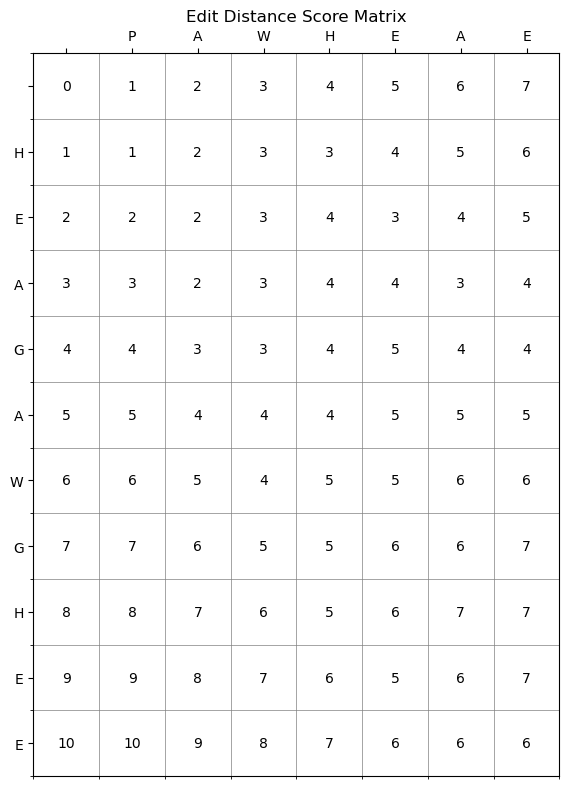

6


In [1]:
from src.distance.edit import levenshtein

edit_distance = levenshtein("HEAGAWGHEE", "PAWHEAE", gap_penalty=+1, plot=True)
print(edit_distance)

### [Hamming Distance](https://www.geeksforgeeks.org/hamming-distance-two-strings/)

The Hamming distance between two strings of equal length is the number of positions at which the corresponding character is different.

Time complexity: $\mathcal{O}(n)$.

In [2]:
from src.distance.edit import hamming

hamming_distance = hamming("1011101", "1001001", gap_penalty=+1, verbose=True)
print(hamming_distance)

Mismatch at position 0: 1 != 0
Mismatch at position 1: 1 != 0
2


## Token-Based Similarities (Word-Level)

- [Jaccard similarity](https://www.geeksforgeeks.org/jaccard-similarity/): $J(A, B) = \lvert \frac{A \cap B}{A \cup B} \rvert$.
- Cosine similarity: angle between vector representations.
- Jaro-Winkler distance: prefix matching.

Jaccard Similarity: 0.43


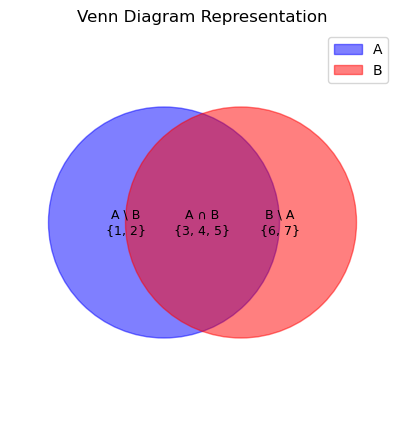

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

A = {1, 2, 3, 4, 5}
B = {3, 4, 5, 6, 7}

jaccard_similarity = len(A & B) / len(A | B)
print(f"Jaccard Similarity: {jaccard_similarity:.2f}")

fig, ax = plt.subplots(figsize=(5, 5))
circle1 = Circle((0.4, 0.5), 0.3, alpha=0.5, color="blue", label="A")
circle2 = Circle((0.6, 0.5), 0.3, alpha=0.5, color="red", label="B")
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.text(0.3, 0.5, f"A \ B\n{A - B}", ha="center", va="center", fontsize=9)
ax.text(0.5, 0.5, f"A ∩ B\n{A & B}", ha="center", va="center", fontsize=9)
ax.text(0.7, 0.5, f"B \ A\n{B - A}", ha="center", va="center", fontsize=9)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect("equal")
ax.axis("off")
plt.title("Venn Diagram Representation")
plt.legend()
plt.show()

Jaccard Similarity: 0.60


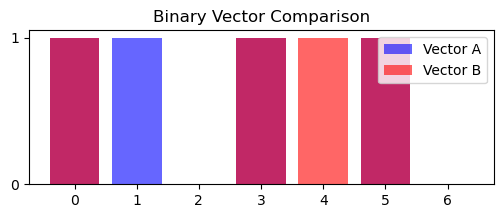

In [4]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([1, 1, 0, 1, 0, 1, 0])
B = np.array([1, 0, 0, 1, 1, 1, 0])

jaccard_similarity = np.sum(np.minimum(A, B)) / np.sum(np.maximum(A, B))
print(f"Jaccard Similarity: {jaccard_similarity:.2f}")

plt.figure(figsize=(6, 2))
plt.bar(range(len(A)), A, color="blue", alpha=0.6, label="Vector A")
plt.bar(range(len(B)), B, color="red", alpha=0.6, label="Vector B")
plt.xticks(range(len(A)))
plt.yticks([0, 1])
plt.legend()
plt.title("Binary Vector Comparison")
plt.show()

Cosine Similarities: AB: 0.79, AC: -0.99, BC: -0.71


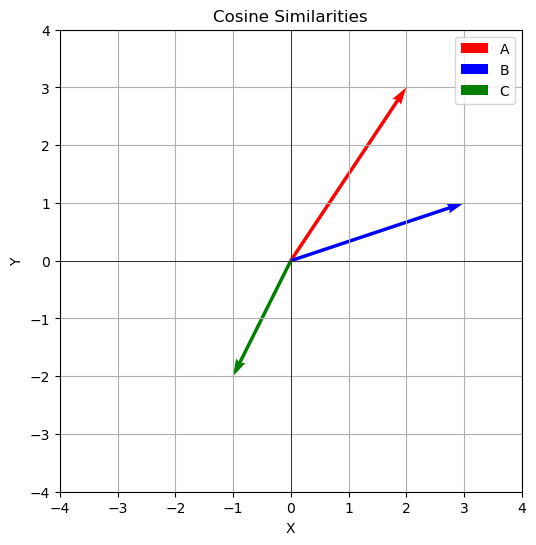

In [5]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([2, 3])
B = np.array([3, 1])
C = np.array([-1, -2])

cosine_similarity_AB = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))
cosine_similarity_AC = np.dot(A, C) / (np.linalg.norm(A) * np.linalg.norm(C))
cosine_similarity_BC = np.dot(B, C) / (np.linalg.norm(B) * np.linalg.norm(C))
print(f"Cosine Similarities: AB: {cosine_similarity_AB:.2f}, AC: {cosine_similarity_AC:.2f}, BC: {cosine_similarity_BC:.2f}")

plt.figure(figsize=(6, 6))
ax = plt.gca()
ax.quiver(0, 0, A[0], A[1], angles="xy", scale_units="xy", scale=1, color="red", label="A")
ax.quiver(0, 0, B[0], B[1], angles="xy", scale_units="xy", scale=1, color="blue", label="B")
ax.quiver(0, 0, C[0], C[1], angles="xy", scale_units="xy", scale=1, color="green", label="C")
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect("equal")
plt.grid(True)
plt.axhline(0, color="black", lw=0.5)
plt.axvline(0, color="black", lw=0.5)
plt.title("Cosine Similarities")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Semantic or Embedding-Based Similarity

- Word Embeddings: capture meaning of words in strings.
- Sentence Embeddings: capture meaning of sentences in strings.